EE 445: Homework Problem Set #1 - Problem 3: Linear Regression

You’re given a small dataset from 1983 on different car models and their charac- teristics: auto-mpg.data. auto-mpg.names explains what each column of variables correspond to.

Answer: Each column of variables corresponds to the attribute information found in the auto-mpg.names file. In order, the columns represent the MPG, cylinders, displacement, horsepower, weight, acceleration, model year, origin, and car name.

Probem 3a: Use 4 continuous-valued, use linear regression to predict the mpg of the different vehicles. Partition your data into roughly 80% training set and 20% test set (save this data allocation). Use the analytical equation of linear regression to learn the best parameters. What is Etrain? What is the test error Etest? Which one is bigger? What did you expect?

Comments: 

After using the analytical technique, the training error was found to be 3.93% while the testing error is 5.26% The testing error is larger than the training error and this is to be expected since the testing set is smaller as well as the theta value is now being evaluated on unseen data.

In [225]:
# Imported Libraries for splitting data, pandas for loading data, and numpy for basic math
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Read in data from the csv file
Car_Data = pd.read_csv('/Users/spencerkerkau/Desktop/EE 445 HW1 Dataset/auto-mpg.data.txt', delim_whitespace=True, 
                   names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
                          'acceleration', 'model_year', 'origin', 'car_name'])

# Convert the data to all values and drop the '?'
Car_Data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')
Car_Data.dropna(subset=['horsepower'], inplace=True)

# Selecting the continuous features as per the attribute information
features = ['displacement', 'horsepower', 'weight', 'acceleration']
target = 'mpg'

# Split the data into features and target
X = data[features]
y = data[target]

# Split the dataset into training set and test set with 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

# Pad a column of ones to the feature lists
X_train_with_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_with_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Analytical solution to linear regression is (X^T * X)^(-1) * X^T * y
theta = np.linalg.inv(X_train_with_bias.T.dot(X_train_with_bias)).dot(X_train_with_bias.T).dot(y_train)

# Make predictions on the training set and the test set
y_train_predict = X_train_with_bias.dot(theta)
y_test_predict = X_test_with_bias.dot(theta)

# Calculate mean square error
Training_mean_squared_error = mean_squared_error(y_train, y_train_predict)
Testing_mean_squared_error = mean_squared_error(y_test, y_test_predict)

# Cauculate training error using root mean square error
Training_Error = np.sqrt(Training_mean_squared_error)
Testing_Error = np.sqrt(Testing_mean_squared_error)

print('Training_Error: ' + str(Training_Error))
print('Testing Error: ' + str(Testing_Error))

Training_Error: 3.9351694038836293
Testing Error: 5.261697166524331


Problem 3b: Randomly allocate data into the training set and test set. Do this 50 times. Recompute Etrain and Etest for each data set. Are the errors the same? Are they wildly varying? What can you say about the data? Is linear regression good enough to predict mpg?

Comments:

After recomputing and creating a histogram of the training and testing error for 50 experiments, the errors remain relatively close with an average training and testing error of 4.19% and 4.32%. The standard deviation of the training and testing data are 0.1 and 0.4. Since the error is relatively low and the deviation is low, the data set provided was sufficient to use linear regression for predicting mpg.

Standard deviation of Training error: 0.10222809096026464
Standard deviation of Testing error: 0.40391495181919373
Average of Training error: 4.1979881350370505
Average of Testing error: 4.320861946992531


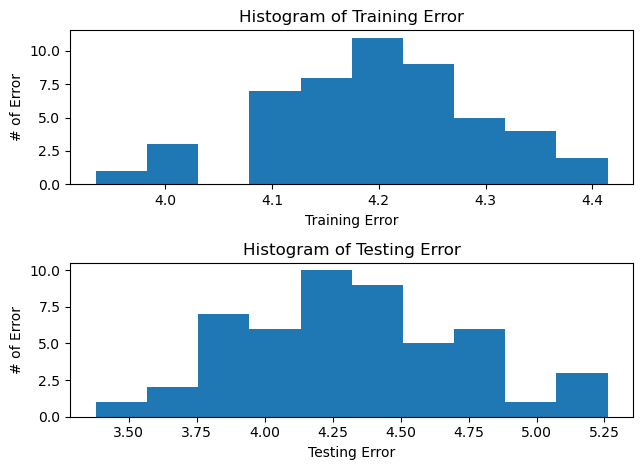

In [234]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# Read in data from the csv file
Car_Data = pd.read_csv('/Users/spencerkerkau/Desktop/EE 445 HW1 Dataset/auto-mpg.data.txt', delim_whitespace=True, 
                   names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
                          'acceleration', 'model_year', 'origin', 'car_name'])

# Convert the data to all values and drop the '?'
Car_Data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')
Car_Data.dropna(subset=['horsepower'], inplace=True)

# Selecting the continuous features as per the attribute information
features = ['displacement', 'horsepower', 'weight', 'acceleration']
target = 'mpg'

# Split the data into features and target
X = data[features]
y = data[target]

Training_error_list = []
Testing_error_list = []

for i in range(50):

    # Split the dataset into training set and test set with 80% training and 20% testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # Pad a column of ones to the feature lists
    X_train_with_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]
    X_test_with_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]

    # Analytical solution to linear regression is (X^T * X)^(-1) * X^T * y
    theta = np.linalg.inv(X_train_with_bias.T.dot(X_train_with_bias)).dot(X_train_with_bias.T).dot(y_train)

    # Make predictions on the training set and the test set
    y_train_predict = X_train_with_bias.dot(theta)
    y_test_predict = X_test_with_bias.dot(theta)

    # Calculate mean square error
    Training_mean_squared_error = mean_squared_error(y_train, y_train_predict)
    Testing_mean_squared_error = mean_squared_error(y_test, y_test_predict)

    # Cauculate training error using root mean square error
    Training_Error = np.sqrt(Training_mean_squared_error)
    Testing_Error = np.sqrt(Testing_mean_squared_error)
    
    # Append the errors to the list
    Training_error_list.append(Training_Error)
    Testing_error_list.append(Testing_Error)

print('Standard deviation of Training error: ' + str(np.std(Training_error_list)))
print('Standard deviation of Testing error: ' + str(np.std(Testing_error_list)))

print('Average of Training error: ' + str(np.average(Training_error_list)))
print('Average of Testing error: ' + str(np.average(Testing_error_list)))

plt.subplot(211)
plt.hist(Training_error_list)
plt.xlabel('Training Error')
plt.ylabel('# of Error')
plt.title('Histogram of Training Error')
plt.plot()

plt.subplot(212)
plt.xlabel('Testing Error')
plt.ylabel('# of Error')
plt.title('Histogram of Testing Error')
plt.hist(Testing_error_list)
plt.plot()

plt.tight_layout()
plt.show()